# KNN算法解决流形二分类问题

###                                                                盛焕新  15220202202189

## 一、调用需要使用到的Python包

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

## 二、读取训练集和测试集数据

In [2]:
#训练集
dt_train = pd.read_csv('./数据/TrainingData.csv', usecols=['0', '1'])
lb_train = pd.read_csv('./数据/TrainingLabels.csv', usecols=['0'])['0']
#测试集
dt_test = pd.read_csv('./数据/TestingData.csv', usecols=['0', '1'])
lb_test = pd.read_csv('./数据/TestingLabels.csv', usecols=['0'])['0']
#其中，dt表示数据，lb表示类标签

## 三、编写KNN算法函数

In [3]:
class KNeighborsClassifier():
    """ 
    借鉴了网络上公开资料，编写此KNN算法
    """
    def __init__(self, dt_train, lb_train, n_neighbors=5, method='educlidean'):
        """
        dt_train:       训练集数据,     dt表示data，        点的数据
        lb_train:       训练集类别，    lb表示label，       类型数据
        n_neighbors:    最近邻的个数,   默认为5，           可以修改
        method:         距离计算方式,   默认为欧几里得距离，可以修改
        """
        self.n_neighbors = n_neighbors
        self.dt_train = dt_train.values
        self.lb_train = lb_train
        self.method = method        
        #数据标准化：
        self.mean = self.dt_train.mean(axis=0)
        self.std = self.dt_train.std(axis=0)
        self.dt_train = (self.dt_train - self.mean) / self.std
            
    def predict(self, dt_test):
        """
        self:           导入数据
        dt_test:        测试集数据
        """
        lb_preds = []
        dt_test = (dt_test - self.mean) / self.std
        
        for i in dt_test.values:
            #欧几里得距离
            if self.method == 'educlidean':
                distance = (((self.dt_train - i)**2).sum(axis=1)**0.5)
            #曼哈顿距离
            elif self.method == 'manhattan':
                distance = (np.abs(self.dt_train - i)).sum(axis=1)
            #切比雪夫距离
            elif self.method == 'chebyshev':
                distance = (np.abs(self.dt_train - i)).max(axis=1)
            k_neighbors_index = np.argsort(distance)[: self.n_neighbors]
            lb_pred = self.lb_train.iloc[k_neighbors_index].mode().item()
            lb_preds.append(lb_pred)
        return pd.Series(lb_preds, name=self.lb_train.name)

## 四、参数选定及交叉验证

In [5]:
from sklearn.model_selection import StratifiedKFold

for n_neighbors in [1,2,3,4,5,6,7,8,9,10]:
    for method in ['educlidean', 'manhattan', 'chebyshev']:
        score = []
        skf = StratifiedKFold(n_splits=10, 
                              shuffle=True, 
                              random_state=39)
        for train_index, validation_index in skf.split(dt_train, lb_train):
            dt_train_1 = dt_train.loc[train_index]
            lb_train_1 = lb_train.loc[train_index]
            dt_validation = dt_train.loc[validation_index]
            lb_validation = lb_train.loc[validation_index]
            knn = KNeighborsClassifier(dt_train_1, 
                                       lb_train_1, 
                                       n_neighbors=n_neighbors, 
                                       method=method)
            lb_pred = knn.predict(dt_validation)
            score.append(accuracy_score(lb_validation, lb_pred))
        print(f'n_neighbors = {n_neighbors}, method = {method}, accuracy = {np.mean(score)}')

NameError: name 'accuracy_score' is not defined

### 1、选取7邻居时、切比雪夫距离下的KNN分类结果：

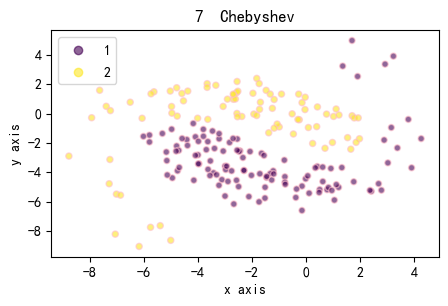

In [142]:
knn = KNeighborsClassifier(dt_train, 
                           lb_train, 
                           n_neighbors=7, 
                           method='chebyshev')
lb_pred = knn.predict(dt_test)

plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(5, 3), dpi=100)

plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('7  Chebyshev')

scatter = plt.scatter(X_test.loc[:, '0'], 
                      dt_test.loc[:, '1'], 
                      c=lb_pred, 
                      s=20, 
                      edgecolors='pink', 
                      alpha=0.6)
plt.legend(*scatter.legend_elements())

plt.savefig('./7  Chebyshev.png')
plt.show()

### 2、选取6邻居时、曼哈顿距离下的KNN分类结果：

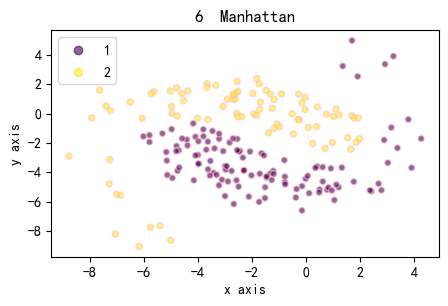

In [143]:
knn = KNeighborsClassifier(dt_train, 
                           lb_train, 
                           n_neighbors=6, 
                           method='manhattan')
lb_pred = knn.predict(dt_test)

plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(5, 3), dpi=100)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('6  Manhattan')

scatter = plt.scatter(X_test.loc[:, '0'], 
                      dt_test.loc[:, '1'], 
                      c=lb_pred, 
                      s=20, 
                      edgecolors='pink', 
                      alpha=0.6)
plt.legend(*scatter.legend_elements())

plt.savefig('./6  Manhattan.png')
plt.show()

### 3、选取5邻居时、欧几里得距离下的KNN分类结果：

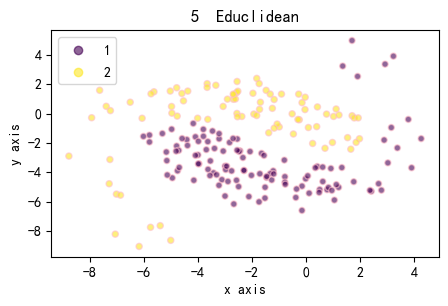

In [144]:
knn = KNeighborsClassifier(dt_train, 
                           lb_train, 
                           n_neighbors=5, 
                           method='educlidean')
lb_pred = knn.predict(dt_test)

plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(5, 3), dpi=100)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('5  Educlidean')

scatter = plt.scatter(X_test.loc[:, '0'], 
                      dt_test.loc[:, '1'], 
                      c=lb_pred, 
                      s=20, 
                      edgecolors='pink', 
                      alpha=0.6)
plt.legend(*scatter.legend_elements())

plt.savefig('./5  Educlidean.png')
plt.show()

## 五、模型检验

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### 1、混淆矩阵

In [107]:
print(confusion_matrix(lb_test, lb_pred))

[[116   0]
 [  0  84]]


### 2、分类报告

In [110]:
print(classification_report(y_true=lb_test, y_pred=lb_pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       116
         2.0       1.00      1.00      1.00        84

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

